<center><h1>Notebook TP1 - TP1 bis<\h1>
</center>
<hr> 
  
<h2 style="color:#FF0000";>Partie 1 - TP1<\h2>


Vous remarquerez l'utilisation des bibliothèques numpy (manipulation de tableau max-min) et pyplot (affichage graphique).

### Import de scikitlearn et autres bibliothèques

In [9]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot

### Données du modèle

In [10]:
# jeu d'apprentissage
sample = np.array([[3.5,0.5],[2.5,2.],[4.5,1.5],[5.,2.5],
                        [6.,4.],[2.5,3.5],[1.,4.],[2.,6.5],[4.,5.5]])
target = np.array([-1,-1,-1,-1,-1,1,1,1,1])
# jeu de test
t_sample= np.array([[2.,3.],[0.,5.],[4.5,5.5],[3.,6.],[7.,6.5],
             [0.5,2.],[1.5,2.],[2.5,1.],[4.5,3.5],[6.5,3.],[7.,5.5]])
t_target = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1])

### Construction du perceptron

In [11]:
Perc1 = Perceptron(random_state=0,verbose=10)
Perc1.fit(t_sample, t_target)

-- Epoch 1
Norm: 6.71, NNZs: 2, Bias: 0.000000, T: 11, Avg. loss: 7.250000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7.76, NNZs: 2, Bias: -2.000000, T: 22, Avg. loss: 5.681818
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.31, NNZs: 2, Bias: -2.000000, T: 33, Avg. loss: 8.022727
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7.50, NNZs: 2, Bias: -4.000000, T: 44, Avg. loss: 2.295455
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.76, NNZs: 2, Bias: -5.000000, T: 55, Avg. loss: 2.318182
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 9.71, NNZs: 2, Bias: -7.000000, T: 66, Avg. loss: 5.113636
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 12.37, NNZs: 2, Bias: -6.000000, T: 77, Avg. loss: 7.704545
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 12.26, NNZs: 2, Bias: -9.000000, T: 88, Avg. loss: 2.295455
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 13.76, NNZs: 2, Bias: -8.000000, T: 99, Avg. loss: 4.636364
Total training time: 0.02 seconds

Perceptron(verbose=10)

### Prédiction et analyse

In [12]:
t_predict = Perc1.predict(t_sample)

In [13]:
print('Accuracy: %.2f' % accuracy_score(t_target, t_predict))

Accuracy: 0.55


In [14]:
Perc1.coef_

array([[-4.5, 13. ]])

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(t_target, t_predict)

array([[1, 5],
       [0, 5]])

## Rendu Graphique

In [16]:
h=0.01
x_min, x_max = sample[:, 0].min() - 2, sample[:, 0].max() + 2
y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1

In [17]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

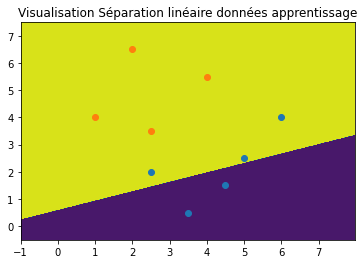

In [18]:
fig, ax = pyplot.subplots()

Z = Perc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.set_title('Visualisation Séparation linéaire données apprentissage')
ax.contourf(xx, yy, Z)
#ax.axis('off')

for value  in [-1,1]:
    idx = np.where(target == value)
    pyplot.scatter(sample[idx, 0], sample[idx, 1])
pyplot.show()

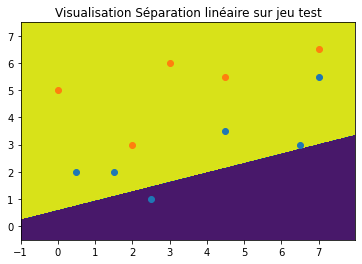

In [19]:
fig, ax = pyplot.subplots()
ax.set_title('Visualisation Séparation linéaire sur jeu test')
ax.contourf(xx, yy, Z)
#ax.axis('off')
for value  in [-1,1]:
    idx = np.where(t_target == value)
    pyplot.scatter(t_sample[idx, 0], t_sample[idx, 1])
pyplot.show()

## Seconde approche

La droite de séparation obtenue passe par (0,0) peut on ajouter un biais ? 

Pour cela on ajoute une coordonnée et égale à 1 à nos points :

In [20]:
sample = np.column_stack((sample,np.ones(9)))
t_sample= np.column_stack((t_sample,np.ones(11)))
sample

array([[3.5, 0.5, 1. ],
       [2.5, 2. , 1. ],
       [4.5, 1.5, 1. ],
       [5. , 2.5, 1. ],
       [6. , 4. , 1. ],
       [2.5, 3.5, 1. ],
       [1. , 4. , 1. ],
       [2. , 6.5, 1. ],
       [4. , 5.5, 1. ]])

In [21]:
Perc1 = Perceptron(random_state=0)
Perc1.fit(t_sample, t_target)
Perc1.coef_

array([[-14.,  16., -12.]])

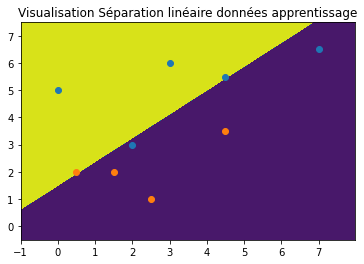

In [22]:
fig, ax = pyplot.subplots()

Z = Perc1.predict(np.c_[xx.ravel(), yy.ravel(), np.ones(len(yy.ravel()))])
Z = Z.reshape(xx.shape)
ax.set_title('Visualisation Séparation linéaire données apprentissage')
ax.contourf(xx, yy, Z)
#ax.axis('off')

for value  in [-1,1]:
    idx = np.where(target == value)
    pyplot.scatter(t_sample[idx, 0], t_sample[idx, 1])
pyplot.show()

La droite passe toujours par (0,0) !

<hr>
<h2 style="color:#FF0000";>Partie 2 - TP1 bis (Iris de fisher)<\h2>

    
### Préambule

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

## Lecture de données

In [25]:
table = pd.read_csv('iris.csv')

In [26]:
table

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
T=np.array(table)

In [28]:
X = np.array(T[:,0:4],dtype=float)

In [29]:
classes = np.unique(T[:,4]);

In [30]:
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
Perc=[Perceptron(),Perceptron(),Perceptron()]

In [32]:
target1 = 2*(T[:,4] == classes[0]) -1;
target2 = 2*(T[:,4] == classes[1]) -1;
target3 = 2*(T[:,4] == classes[2]) -1;
Target=[target1,target2,target3]
#X_train,x_test,Y_train,y_test = train_test_split(X,target1,test_size=0.30)

In [33]:
Target

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1

In [34]:
for i in [0,1,2]:
    Perc[i].fit(X,Target[i]);

In [35]:
Axe1 =  Perc[0].coef_; Axe1 = Axe1/np.sqrt(Axe1[0,0]**2+Axe1[0,1]**2+Axe1[0,2]**2+Axe1[0,3]**2);
Axe2 =  Perc[1].coef_; Axe2 = Axe2/np.sqrt(Axe2[0,0]**2+Axe2[0,1]**2+Axe2[0,2]**2+Axe2[0,3]**2);
Axe3 =  Perc[2].coef_; Axe3 = Axe3/np.sqrt(Axe3[0,0]**2+Axe3[0,1]**2+Axe3[0,2]**2+Axe3[0,3]**2);

In [36]:
Axes=np.array([Axe1[0,:],Axe2[0,:],Axe3[0,:]])

In [37]:
Axes

array([[ 0.239954  ,  0.47990799, -0.75258299, -0.38174499],
       [ 0.17475965, -0.63124391,  0.24707399, -0.71410408],
       [-0.41096465, -0.36845106,  0.59417795,  0.58506789]])

In [38]:
Coor = np.ones(3*150).reshape(150,3);
for j in range(3):
    for i in range(150):
        Coor[i,j]= np.dot(X[i,:],Axes[j,:])

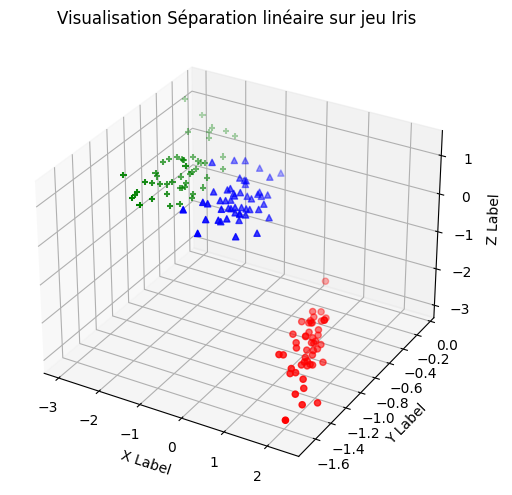

In [39]:
fig = pyplot.figure(figsize=(10,6), dpi= 100)
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Visualisation Séparation linéaire sur jeu Iris')
#ax.axis('off')
m=['o','^','+']
c=['r','b','g']
for i  in range(3):
    idx = np.where(Target[i] == 1)
    ax.scatter(Coor[idx, 0], Coor[idx, 1],Coor[idx, 2],marker=m[i],c=c[i])
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
pyplot.show()

In [40]:
Y = [np.ones(150),np.ones(150),np.ones(150)]
for i in [0,1,2]:
    Y[i]=Perc[i].predict(X);

In [41]:
for i in range(3):
    print('Accuracy {classes[i]}: %.2f' % accuracy_score(Target[i], Y[i]))


Accuracy {classes[i]}: 1.00
Accuracy {classes[i]}: 0.65
Accuracy {classes[i]}: 0.98


# 2 eme approche (prise en compte du biais)

In [42]:
Xn= np.column_stack((X,np.ones(150)))

In [43]:
Percn=[Perceptron(),Perceptron(),Perceptron()]

In [44]:
for i in range(3):
    Percn[i].fit(Xn,Target[i]);

In [45]:
Axe1 =  Percn[0].coef_; Axe1 = Axe1[0,0:4]/np.sqrt(Axe1[0,0]**2+Axe1[0,1]**2+Axe1[0,2]**2+Axe1[0,3]**2);
Axe2 =  Percn[1].coef_; Axe2 = Axe2[0,0:4]/np.sqrt(Axe2[0,0]**2+Axe2[0,1]**2+Axe2[0,2]**2+Axe2[0,3]**2);
Axe3 =  Percn[2].coef_; Axe3 = Axe3[0,0:4]/np.sqrt(Axe3[0,0]**2+Axe3[0,1]**2+Axe3[0,2]**2+Axe3[0,3]**2);

In [46]:
Axes=np.array([Axe1,Axe2,Axe3])

In [47]:
Axes

array([[ 0.10236643,  0.41970234, -0.80869476, -0.39922906],
       [ 0.1513963 , -0.66381453,  0.22855018, -0.69584067],
       [-0.39723382, -0.31171821,  0.61378143,  0.60688501]])

In [48]:
Coor = np.ones(3*150).reshape(150,3);
for j in range(3):
    for i in range(150):
        Coor[i,j]= np.dot(X[i,:],Axes[j,:])

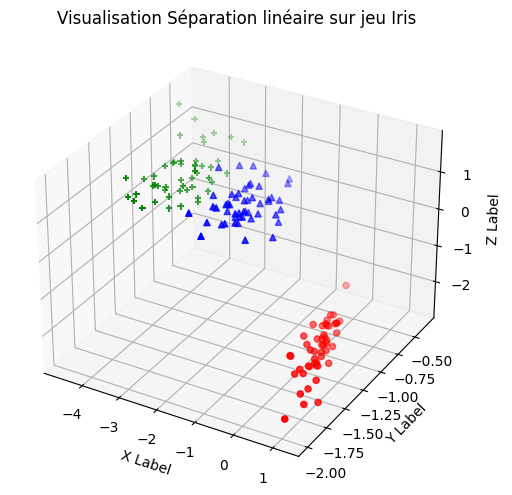

In [49]:
fig = pyplot.figure(figsize=(10,6), dpi= 100)
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Visualisation Séparation linéaire sur jeu Iris')
#ax.axis('off')
m=['o','^','+']
c=['r','b','g']
for i  in range(3):
    idx = np.where(Target[i] == 1)
    ax.scatter(Coor[idx, 0], Coor[idx, 1],Coor[idx, 2],marker=m[i],c=c[i])
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
pyplot.show()

In [50]:
Y = [np.ones(150),np.ones(150),np.ones(150)]
for i in [0,1,2]:
    Y[i]=Percn[i].predict(Xn);

In [51]:
for i in range(3):
    print('Accuracy: %.2f' % accuracy_score(Target[i], Y[i]))


Accuracy: 1.00
Accuracy: 0.69
Accuracy: 0.95


<hr>
<h2 style="color:#FF0000";>Partie 3 - TP1 ter (Iris de fisher)<\h2>
 

   
### Préambule

source : https://www.python-course.eu/neural_networks_with_scikit.php

In [53]:
iris.data = X;
iris.target = np.ones(150)
for i in range(3):
    idx=np.where(Target[i]==1)
    iris.target[idx]=i

NameError: name 'iris' is not defined

In [54]:
# splitting into train and test datasets

from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

NameError: name 'iris' is not defined

In [398]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[ 0.04782965 -0.10458284  0.73586216  0.79089037]
 [-0.9087633   0.59263609 -1.1887004  -0.93227859]
 [ 0.76527436 -0.10458284  1.13209562  1.3210962 ]]


In [408]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(60,50,4), max_iter=10000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(60, 50, 4), max_iter=10000)

In [409]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.9833333333333333
1.0


In [410]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions_train, train_labels)

array([[39,  0,  0],
       [ 0, 41,  1],
       [ 0,  1, 38]])

In [282]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.92      0.96        13
         2.0       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<hr>
<h2 style="color:#FF0000";>Partie 4 - Sur apprentissage<\h2>
 

In [199]:
import numpy as np
from sklearn.neural_network import MLPClassifier


h=0.001
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

In [209]:
n=50
p=50

for test in range(1,10):

    Sample      = np.random.rand(n,2)
    Sample_test = np.random.rand(p,2)
    Target = np.random.randint(0,2,n)
    Target_test = np.random.randint(0,2,p)

    mlp = MLPClassifier(hidden_layer_sizes=(141,51,21), max_iter=100000, 
                        tol=1e-12,solver='lbfgs')
    mlp.fit(Sample, Target)

    Predict = mlp.predict(Sample)
    Predict_test = mlp.predict(Sample_test)

    print('Accuracy Sample : ', end=" ") 
    print(accuracy_score(Target, Predict), end=" Test : ")
    print(accuracy_score(Target_test, Predict_test), end="\n")


Accuracy Sample :  0.9 Test : 0.54
Accuracy Sample :  1.0 Test : 0.68
Accuracy Sample :  1.0 Test : 0.44
Accuracy Sample :  0.98 Test : 0.54
Accuracy Sample :  1.0 Test : 0.54
Accuracy Sample :  0.9 Test : 0.42
Accuracy Sample :  1.0 Test : 0.54
Accuracy Sample :  0.78 Test : 0.5
Accuracy Sample :  1.0 Test : 0.46


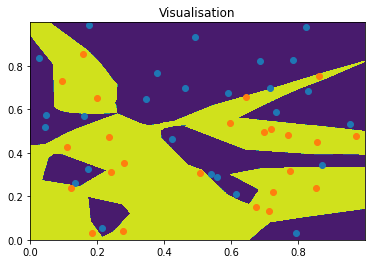

In [210]:
fig, ax = pyplot.subplots()
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.set_title('Visualisation')
ax.contourf(xx, yy, Z)
#ax.axis('off')
for value  in [0,1]:
    idx = np.where(Target == value)
    pyplot.scatter(Sample[idx, 0], Sample[idx, 1])
pyplot.show()
